# 互评作业二

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm #使用直方图和最大似然高斯分布拟合绘制分布

## 1.读取数据与预处理

读取 Attribute lines<br>
-- Attribute lines:
&emsp;For example, 'A,1277,1,"NetShow for PowerPoint","/stream"'<br>
&emsp;&emsp;Where:<br>
&emsp;&emsp;&emsp;&emsp;'A' marks this as an attribute line,<br>
&emsp;&emsp;&emsp;&emsp;'1277' is the attribute ID number for an area of the website(called a Vroot),<br>
&emsp;&emsp;&emsp;&emsp;'1' may be ignored,<br>
&emsp;&emsp;&emsp;&emsp;'"NetShow for PowerPoint"' is the title of the Vroot,<br>
&emsp;&emsp;&emsp;&emsp;'"/stream"' is the URL relative to "http://www.microsoft.com"<br>

In [26]:
data_A = pd.read_csv('anonymous-msweb.data',names=["attribute","id", "1", "title_vroot", "url"], header=6,nrows =294)
data_A

,attribute,id,1,title_vroot,url
0,A,1287,1,International AutoRoute,/autoroute
1,A,1288,1,library,/library
2,A,1289,1,Master Chef Product Information,/masterchef
3,A,1297,1,Central America,/centroam
4,A,1215,1,For Developers Only Info,/developer
...,...,...,...,...,...
289,A,1219,1,Corporate Advertising Content,/ads
290,A,1030,1,Windows NT Server,/ntserver
291,A,1182,1,Fortran,/fortran
292,A,1100,1,MS in Education,/education


In [27]:
data_A.shape

(294, 5)

取出data_A中所有的id

In [57]:
all_vroot_id = list(data_A['id'].unique())
print(len(all_vroot_id))
all_vroot_id

294


[1287,
 1288,
 1289,
 1297,
 1215,
 1279,
 1239,
 1282,
 1251,
 1121,
 1083,
 1145,
 1276,
 1200,
 1259,
 1155,
 1092,
 1004,
 1057,
 1140,
 1198,
 1147,
 1005,
 1026,
 1119,
 1216,
 1218,
 1205,
 1269,
 1031,
 1003,
 1238,
 1118,
 1242,
 1171,
 1175,
 1021,
 1222,
 1284,
 1294,
 1053,
 1293,
 1167,
 1202,
 1234,
 1054,
 1262,
 1074,
 1027,
 1061,
 1236,
 1212,
 1204,
 1196,
 1188,
 1228,
 1078,
 1008,
 1052,
 1091,
 1280,
 1247,
 1064,
 1065,
 1133,
 1102,
 1132,
 1240,
 1225,
 1130,
 1157,
 1058,
 1076,
 1163,
 1187,
 1152,
 1139,
 1223,
 1001,
 1043,
 1165,
 1194,
 1138,
 1158,
 1094,
 1055,
 1277,
 1143,
 1068,
 1229,
 1177,
 1014,
 1019,
 1122,
 1041,
 1033,
 1233,
 1211,
 1199,
 1024,
 1179,
 1067,
 1181,
 1174,
 1162,
 1046,
 1197,
 1231,
 1141,
 1120,
 1112,
 1142,
 1250,
 1214,
 1190,
 1098,
 1263,
 1049,
 1073,
 1166,
 1226,
 1184,
 1025,
 1160,
 1156,
 1268,
 1220,
 1060,
 1203,
 1176,
 1168,
 1066,
 1128,
 1275,
 1136,
 1146,
 1237,
 1081,
 1016,
 1069,
 1148,
 1161,
 1013,

说明data_A中有294个网址并且都不相同

读取Case and Vote Lines<br>
-- Case and Vote Lines:<br>
                    &emsp;For each user, there is a case line followed by zero or more vote lines.<br>
                     &emsp;&emsp;For example:<br>
                           &emsp;&emsp;&emsp;&emsp;C,"10164",10164<br>
                           &emsp;&emsp;&emsp;&emsp;V,1123,1<br>
                           &emsp;&emsp;&emsp;&emsp;V,1009,1<br>
                           &emsp;&emsp;&emsp;&emsp;V,1052,1<br>
                      &emsp;&emsp;Where:<br>
                         &emsp;&emsp;&emsp;&emsp;'C' marks this as a case line,<br>
                         &emsp;&emsp;&emsp;&emsp; '10164' is the case ID number of a user,<br>
                         &emsp;&emsp;&emsp;&emsp;'V' marks the vote lines for this case,<br>
                         &emsp;&emsp;&emsp;&emsp;'1123', 1009', 1052' are the attributes ID's of Vroots that a
                                user visited.<br>
                          &emsp;&emsp;&emsp;&emsp;'1' may be ignored.<br>

In [49]:
data_cv = pd.read_csv('anonymous-msweb.data',skiprows=range(300),names=["attribute","id", "1","NAN1","NAN2"], header=0)
data_cv.drop(columns=['NAN1','NAN2'],inplace=True)
data_cv

,attribute,id,1
0,C,10001,10001
1,V,1000,1
2,V,1001,1
3,V,1002,1
4,C,10002,10002
...,...,...,...
131360,V,1035,1
131361,V,1001,1
131362,V,1018,1
131363,C,42711,42711


查看一下，V中的id是否和data_A中的ID符合

In [59]:
false_row = []
for i in range(131365):
    if temp_row['attribute'] == 'V':
        if temp_row['id'] not in all_vroot_id:
            false_row.append(i)
false_row

[]

说明CV数据中都是合法的数据

Missing Attribute Values: The data is very sparse, so vroot visits are explicit,
    nonvisits are implicit (missing).

可以认为所有的数据都是合法的

将CV数据处理成列表的形式，以便后面算法运行使用

In [58]:
case_all = []
case = []
# 遍历整个data_cv表
for i in range(131365):
    temp_row = data_cv.iloc[i]
    if temp_row['attribute'] == 'C':
        case_all.append(case)
        case = []
    else:
        case.append(temp_row['id'])

case_all.append(case)
# 除去第一个[]
del case_all[0]
print(case_all)

[[1000, 1001, 1002], [1001, 1003], [1001, 1003, 1004], [1005], [1006], [1003, 1004], [1007], [1004], [1008, 1009], [1010, 1000, 1011, 1012, 1013, 1014], [1015, 1016, 1017, 1018, 1019], [1020, 1021], [1022], [1023], [1024], [1025, 1026], [1027, 1017, 1026, 1028], [1004], [1017, 1004, 1018, 1029, 1008, 1030, 1031, 1032, 1003, 1033, 1002], [1008, 1001, 1034, 1002], [1017, 1004, 1018, 1035, 1036, 1008, 1037, 1009, 1038, 1026, 1039, 1040, 1032, 1041, 1042, 1034, 1043], [1008, 1017, 1004], [1008], [1044], [1045], [1034], [1008, 1046, 1034], [1295], [1034], [1017, 1048], [1045, 1049, 1018, 1008, 1035, 1027, 1046, 1009, 1031, 1041, 1001, 1003, 1002, 1034], [1050], [1032], [1037, 1009, 1004], [1008, 1051, 1038, 1031, 1052, 1053, 1018], [1051, 1054, 1018, 1035, 1008, 1009, 1026, 1040, 1052, 1041, 1003, 1034, 1048], [1008, 1055, 1056, 1017, 1032], [1008, 1027, 1026, 1041, 1032, 1001, 1003, 1018, 1057], [1000, 1058, 1017, 1049, 1001, 1034], [1008, 1034], [1008, 1009, 1034], [1030, 1004], [1008, 10

查看一下每个case中是否有相同的出现

In [137]:
i = 0
for ca in case_all:
    temp = set(ca)
    if len(ca) > len(temp):
        i = i+1
i
    

0

说明每个case当中都没有重复的出现

#### 测试集

In [156]:
test_data_A = pd.read_csv('anonymous-msweb.test',names=["attribute","id", "1", "title_vroot", "url"], header=6,nrows =294)
test_data_A

,attribute,id,1,title_vroot,url
0,A,1277,1,NetShow for PowerPoint,/stream
1,A,1253,1,MS Word Development,/worddev
2,A,1109,1,TechNet (World Wide Web Edition),/technet
3,A,1038,1,SiteBuilder Network Membership,/sbnmember
4,A,1205,1,Hardware Supprt,/hardwaresupport
...,...,...,...,...,...
289,A,1220,1,Mac Office Support,/macofficesupport
290,A,1039,1,Internet Service Providers,/isp
291,A,1202,1,Advanced Technology,/advtech
292,A,1291,1,news,/news


In [157]:
test_all_vroot_id = list(test_data_A['id'].unique())
print(len(test_all_vroot_id))
test_all_vroot_id

294


[1277,
 1253,
 1109,
 1038,
 1205,
 1076,
 1100,
 1229,
 1172,
 1173,
 1283,
 1167,
 1290,
 1193,
 1153,
 1013,
 1241,
 1169,
 1260,
 1063,
 1252,
 1263,
 1166,
 1068,
 1196,
 1102,
 1091,
 1230,
 1069,
 1140,
 1278,
 1055,
 1058,
 1266,
 1027,
 1146,
 1190,
 1163,
 1210,
 1015,
 1001,
 1246,
 1179,
 1059,
 1212,
 1191,
 1022,
 1113,
 1042,
 1118,
 1254,
 1089,
 1203,
 1231,
 1007,
 1155,
 1235,
 1234,
 1048,
 1124,
 1106,
 1132,
 1082,
 1112,
 1228,
 1270,
 1164,
 1189,
 1224,
 1129,
 1261,
 1045,
 1198,
 1085,
 1067,
 1159,
 1070,
 1141,
 1239,
 1154,
 1084,
 1192,
 1046,
 1036,
 1017,
 1137,
 1074,
 1029,
 1161,
 1087,
 1049,
 1188,
 1135,
 1147,
 1297,
 1071,
 1218,
 1162,
 1178,
 1245,
 1012,
 1215,
 1003,
 1035,
 1176,
 1244,
 1237,
 1065,
 1222,
 1197,
 1194,
 1051,
 1219,
 1000,
 1213,
 1295,
 1095,
 1108,
 1223,
 1248,
 1090,
 1073,
 1014,
 1186,
 1184,
 1259,
 1061,
 1177,
 1206,
 1225,
 1066,
 1200,
 1041,
 1133,
 1083,
 1150,
 1094,
 1020,
 1096,
 1209,
 1175,
 1024,
 1040,

In [158]:
test_data_cv = pd.read_csv('anonymous-msweb.test',skiprows=range(300),names=["attribute","id", "1","NAN1","NAN2"], header=0)
test_data_cv.drop(columns=['NAN1','NAN2'],inplace=True)
test_data_cv

,attribute,id,1
0,C,10001,10001
1,V,1038,1
2,V,1026,1
3,V,1034,1
4,C,10002,10002
...,...,...,...
20186,V,1026,1
20187,V,1041,1
20188,C,15000,15000
20189,V,1000,1


In [159]:
# 测试
false_row = []
for i in range(20190):
    if temp_row['attribute'] == 'V':
        if temp_row['id'] not in test_all_vroot_id:
            false_row.append(i)
false_row

[]

In [162]:
test_case_all = []
test_case = []
# 遍历整个data_cv表
for i in range(20190):
    temp_row = test_data_cv.iloc[i]
    if temp_row['attribute'] == 'C':
        test_case_all.append(test_case)
        test_case = []
    else:
        test_case.append(temp_row['id'])

test_case_all.append(case)
# 除去第一个[]
del test_case_all[0]
print(test_case_all)

[[1038, 1026, 1034], [1008, 1056, 1032], [1064, 1065, 1020, 1007, 1038, 1026, 1052, 1041, 1028], [1004], [1017, 1156, 1004, 1018, 1008, 1027, 1009, 1046, 1038, 1006, 1026, 1052, 1060, 1001, 1041, 1034], [1034, 1004], [1008, 1000, 1035, 1016, 1031, 1003, 1034, 1018], [1065, 1123, 1009, 1007], [1017, 1043], [1032, 1004], [1036, 1077, 1003, 1001], [1004], [1008, 1130, 1035, 1034, 1018], [1008, 1009, 1001, 1034], [1003, 1004], [1025, 1026], [1004], [1008, 1058, 1017, 1018], [1034], [1008, 1004, 1034], [1207], [1038, 1125, 1026, 1053], [1008, 1073], [1073], [1004], [1009], [1105], [1027, 1123, 1034], [1034], [1008, 1034], [1008], [1008, 1007], [1036, 1008, 1037, 1009], [1040, 1017, 1092, 1050, 1004], [1034], [1004, 1034], [1008, 1016, 1152, 1052, 1040, 1034, 1014], [1045, 1008, 1027, 1026, 1034], [1017, 1003, 1001, 1002, 1004], [1008], [1123, 1004], [1008, 1073], [1008, 1034, 1004], [1001], [1008], [1030, 1037, 1009], [1008, 1035, 1037, 1009, 1070, 1018], [1008, 1010], [1017], [1000, 1004],

In [163]:
i = 0
for ca in test_case_all:
    temp = set(ca)
    if len(ca) > len(temp):
        i = i+1
i

0

说明每个case当中都没有重复的出现

## 1 数据探索性分析

### data

分离出V 

In [60]:
data_v = data_cv[data_cv['attribute']=='V']
data_v

,attribute,id,1
1,V,1000,1
2,V,1001,1
3,V,1002,1
5,V,1001,1
6,V,1003,1
...,...,...,...
131358,V,1003,1
131360,V,1035,1
131361,V,1001,1
131362,V,1018,1


In [64]:
data_v['id'].dtype

dtype('int64')

对这些浏览的网站进行分析

In [70]:
data_v['id'].nunique()

285

<Axes: >

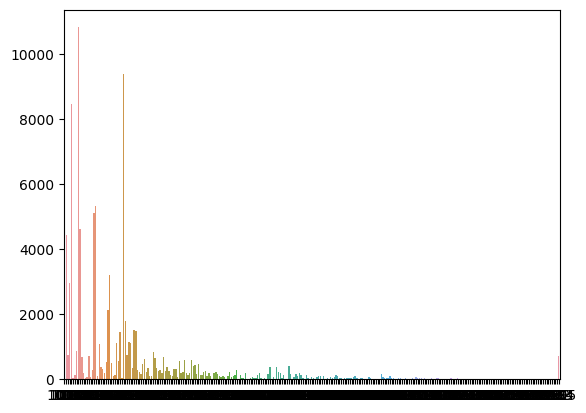

In [82]:
sns.barplot(y=data_v['id'].value_counts().values, x=data_v['id'].value_counts().index)

C:\Users\user\AppData\Local\Temp\ipykernel_17052\3011320214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_v['id'].value_counts())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


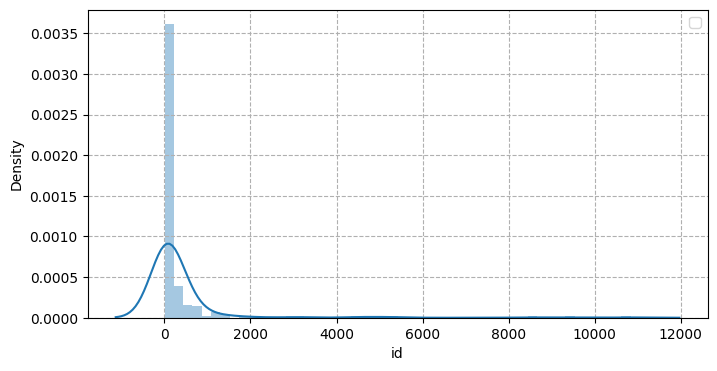

In [81]:
plt.figure(figsize=(8,4))
sns.distplot(data_v['id'].value_counts())
# 用标准正态分布拟合
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [90]:

id_counts = data_v['id'].value_counts()
id_counts

1008    10836
1034     9383
1004     8463
1018     5330
1017     5108
        ...  
1196        1
1199        1
1233        1
1128        1
1284        1
Name: id, Length: 285, dtype: int64

最大的为1008对应的网站为A,1008,1,"Free Downloads","/msdownload"

下载页面使用的人最多

查看一下访问次数再2000以上的网页的分布

In [91]:
n = 2000
print(id_counts[id_counts>n])

# sns.barplot(y=data_v['id'].value_counts().values, x=data_v['id'].value_counts().index)

1008    10836
1034     9383
1004     8463
1018     5330
1017     5108
1009     4628
1001     4451
1026     3220
1003     2968
1025     2123
Name: id, dtype: int64


In [104]:
id_counts[id_counts>n].index.tolist()
id_counts[id_counts>n].values.tolist()

[10836, 9383, 8463, 5330, 5108, 4628, 4451, 3220, 2968, 2123]

In [125]:
len(case_all)

32711

In [124]:
# 查看对应的网页

id_counts_top = pd.DataFrame(id_counts[id_counts>n].index.tolist())

id_counts_top['id_counts'] = id_counts[id_counts>n].values.tolist()
id_counts_top.columns = ['id','id_counts']
title_vroot = []
url = []
for i in range(10):
    temp_id = id_counts_top.iloc[i].id
    title_vroot.append(data_A[data_A['id'] == temp_id].title_vroot.values[0])
#     print(data_A[data_A['id'] == temp_id].title_vroot.values)
    url.append(data_A[data_A['id']==temp_id].url.values[0])

id_counts_top['title_vroot']=title_vroot
id_counts_top['url']=url

id_counts_top

,id,id_counts,title_vroot,url
0,1008,10836,Free Downloads,/msdownload
1,1034,9383,Internet Explorer,/ie
2,1004,8463,Microsoft.com Search,/search
3,1018,5330,isapi,/isapi
4,1017,5108,Products,/products
5,1009,4628,Windows Family of OSs,/windows
6,1001,4451,Support Desktop,/support
7,1026,3220,Internet Site Construction for Developers,/sitebuilder
8,1003,2968,Knowledge Base,/kb
9,1025,2123,Web Site Builder's Gallery,/gallery


32711人，点击超过2000的页面如上

### test

In [164]:
test_data_v = test_data_cv[test_data_cv['attribute']=='V']
test_data_v

,attribute,id,1
1,V,1038,1
2,V,1026,1
3,V,1034,1
5,V,1008,1
6,V,1056,1
...,...,...,...
20185,V,1027,1
20186,V,1026,1
20187,V,1041,1
20189,V,1000,1


<Axes: >

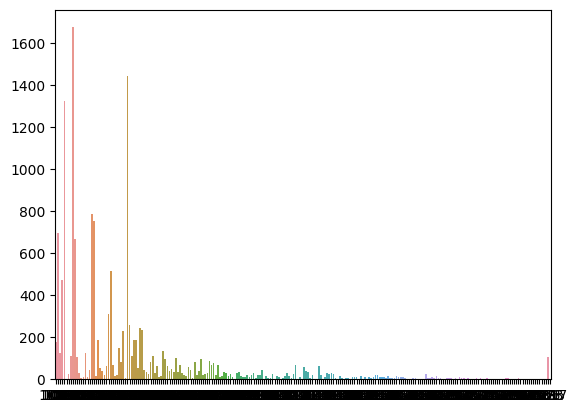

In [165]:
sns.barplot(y=test_data_v['id'].value_counts().values, x=test_data_v['id'].value_counts().index)

data集和测试集的分布是一样的

## 3 关联规则分析

### 使用Apriori算法

In [153]:
from efficient_apriori import apriori

itemsets, rules = apriori(case_all, min_support=0.1, min_confidence = 0.1)
print(item)
print(rules)

<function item at 0x000001B98E9C8C10>
[{1034} -> {1008}, {1008} -> {1034}]


In [168]:
from apyori import apriori

result = list(apriori(transactions=case_all))

result

[RelationRecord(items=frozenset({1001}), support=0.1360704350218581, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1001}), confidence=0.1360704350218581, lift=1.0)]),
 RelationRecord(items=frozenset({1004}), support=0.2587203081532206, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1004}), confidence=0.2587203081532206, lift=1.0)]),
 RelationRecord(items=frozenset({1008}), support=0.33126471217633213, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1008}), confidence=0.33126471217633213, lift=1.0)]),
 RelationRecord(items=frozenset({1009}), support=0.14148145883647703, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1009}), confidence=0.14148145883647703, lift=1.0)]),
 RelationRecord(items=frozenset({1017}), support=0.1561554217235792, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1017}), confidence=0.156155421723

说明：<br>

support:支持度<br>
ordered_statistics: 关联规则<br>
confidence: 置信度<br>
lift：提升度（提升度反映了关联规则中的 A 与 B 的相关性，提升度 > 1 且越高表明正相关性越高，提升度 < 1 且越低表明负相关性越高，提升度 = 1 表明没有相关性。）

从上面运行apriori算法的结果：[{1034} -> {1008}, {1008} -> {1034}]是强关联规则

Kulc系数和IR

In [179]:
kulc = (0.5605882979857189 + 0.4854189737910668)/2
IR = 0.5605882979857189/0.4854189737910668

print("kula系数：{}".format(kulc) )
print("IR不平衡比：{}".format(IR))

kula系数：0.5230036358883928
IR不平衡比：1.154854524139401


说明两条规则比较平衡，访问了1034也会访问1008 ，访问了1008很可能也访问1034

支持度、置信度、提升度

items=frozenset({1008, 1034}), support=0.16080217663782825<br>
{1034} -> {1008} confidence=0.5605882979857189, lift=1.6922668711158038<br>
{1008} -> {1034} confidence=0.4854189737910668, lift=1.6922668711158035<br>
{1001} support=0.1360704350218581, confidence=0.1360704350218581<br>
{1004} support=0.33126471217633213, confidence=0.2587203081532206<br>
{1008} support=0.33126471217633213,confidence=0.33126471217633213<br>
{1009} support=0.14148145883647703, confidence=0.14148145883647703, <br>
{1017} support=0.1561554217235792, confidence=0.1561554217235792,<br>
{1018} support=0.162942129558864, confidence=0.162942129558864, <br>
{1034} support=0.2868454036868332, confidence=0.2868454036868332

In [150]:
len(case_all)

32711

In [151]:
data_v.shape[0]

98654

### test验证

In [169]:
result = list(apriori(transactions=test_case_all,min_support=0.1))

result

[RelationRecord(items=frozenset({1001}), support=0.139, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1001}), confidence=0.139, lift=1.0)]),
 RelationRecord(items=frozenset({1004}), support=0.2648, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1004}), confidence=0.2648, lift=1.0)]),
 RelationRecord(items=frozenset({1008}), support=0.3352, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1008}), confidence=0.3352, lift=1.0)]),
 RelationRecord(items=frozenset({1009}), support=0.1332, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1009}), confidence=0.1332, lift=1.0)]),
 RelationRecord(items=frozenset({1017}), support=0.157, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1017}), confidence=0.157, lift=1.0)]),
 RelationRecord(items=frozenset({1018}), support=0.1504, ordered_statistics=[OrderedStatistic(items_base=froz

和data集的结果相似

### FP-growth算法

In [171]:
import pyfpgrowth

patterns = pyfpgrowth.find_frequent_patterns(case_all,len(case_all)*0.1)
rules = pyfpgrowth.generate_association_rules(patterns,0.1)
print(patterns)
print("===============")
print(rules)

{(1001,): 4451, (1009,): 4628, (1017,): 5108, (1018,): 5330, (1004,): 8463, (1034,): 9383, (1008, 1034): 5260, (1008,): 10836}
{(1008,): ((1034,), 0.4854189737910668), (1034,): ((1008,), 0.5605882979857189)}


In [176]:
print('{1008,1034} support:'+ str(5260/len(case_all)))
print('{1008,1034} confidence :'+ str(0.4854189737910668))
print("{1008}->{1034} lift: "+ str(0.4854189737910668/(9383/len(case_all))))


{1008,1034} support:0.16080217663782825
{1008,1034} confidence :0.4854189737910668
{1008}->{1034} lift: 1.6922668711158035


In [178]:
print('{1034,1008} support:'+ str(5260/len(case_all)))
print('{1034,1008} confidence :'+ str(0.5605882979857189))
print("{1034,1008} lift: "+ str(0.5605882979857189/(10836/len(case_all))))

{1034,1008} support:0.16080217663782825
{1034,1008} confidence :0.5605882979857189
{1034,1008} lift: 1.6922668711158038


可以看到FP-growth算法和Apriori的结果是一致的

### 4.基于关联规则的网站建议

1、Free Downloads(/msdownlaod 1008)放在网站首页明显的位置上，Internet Explorer(/ie 1034)应该是网站的入口<br>
2、Microsoft Search(/search 1004)在网站主页面明显的位置上<br>
3、isapi(/isapi 1018) 、Products(/products 1017)、 Windows Family of OSs(/windows 1009)、Support Desktop（/support 1001）访问的数量较多，都是单独访问，所以可以在网站主页面上放一个单独的栏目存放这些网址